In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


##  Preprocessing & SMOTE

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df.duplicated().sum()

np.int64(1081)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


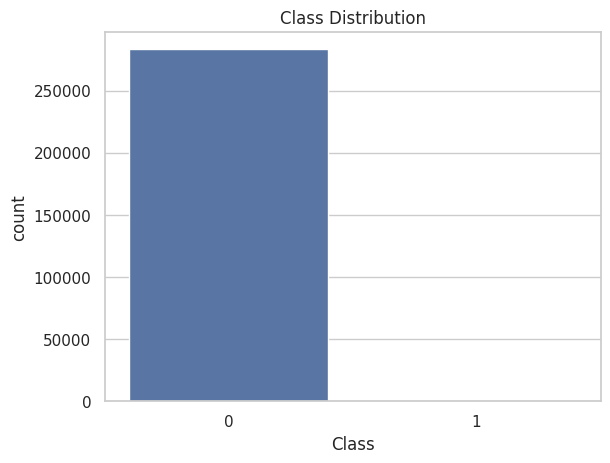

In [ ]:
sns.countplot(data=df, x='Class')
plt.title('Class Distribution')
plt.show()

In [ ]:
X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

X_res_df = pd.DataFrame(X_res, columns=X.columns)
y_res_df = pd.DataFrame(y_res, columns=["Class"])

balanced_df = pd.concat([X_res_df, y_res_df], axis=1)
balanced_df.to_csv("balanced_creditcard.csv", index=False)
print("Saved balanced dataset to balanced_creditcard.csv")

Saved balanced dataset to balanced_creditcard.csv


## EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

##  Class Distribution

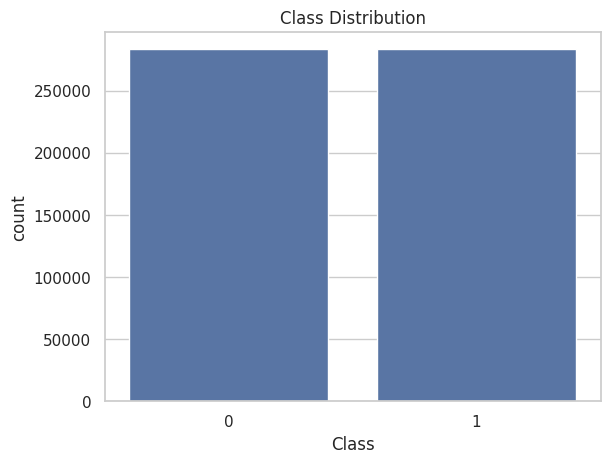

In [ ]:
sns.countplot(data=balanced_df, x='Class')
plt.title('Class Distribution')
plt.show()

##  Boxplot of Amount by Class

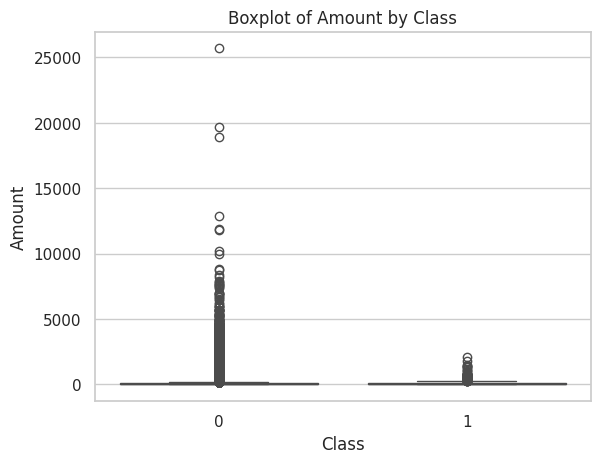

In [ ]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Boxplot of Amount by Class')
plt.show()

##  KDE Plot of Selected Features

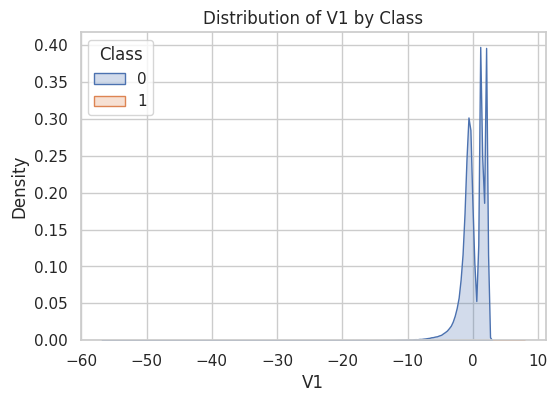

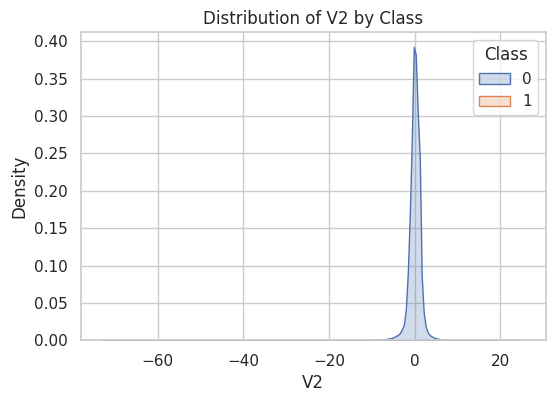

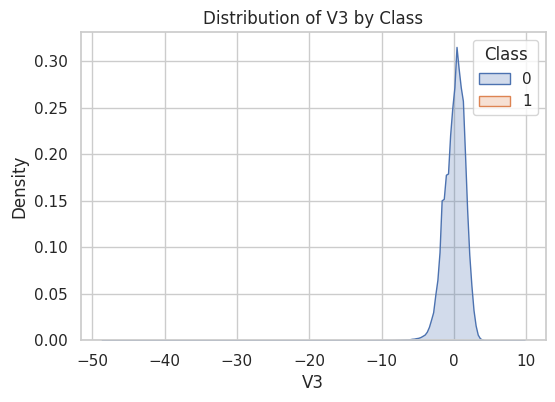

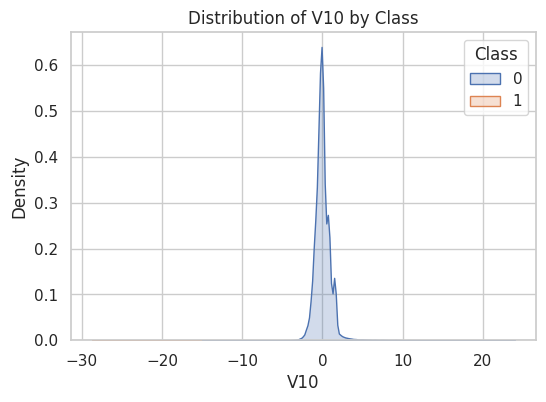

In [ ]:
features = ['V1', 'V2', 'V3', 'V10']
for col in features:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df, x=col, hue='Class', fill=True)
    plt.title(f'Distribution of {col} by Class')
    plt.show()

##  Univariate Analysis

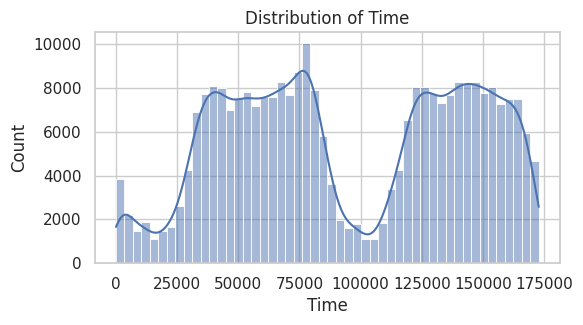

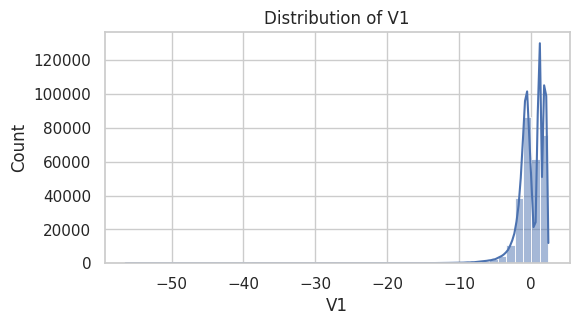

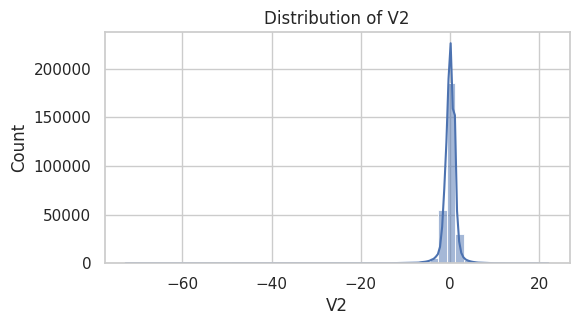

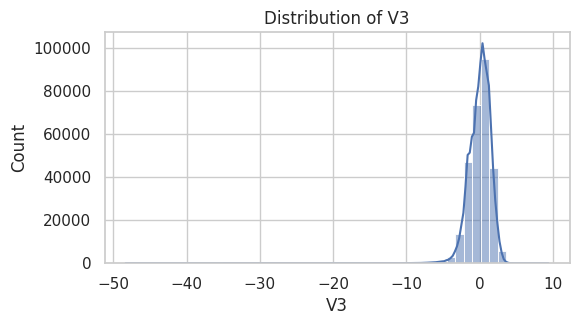

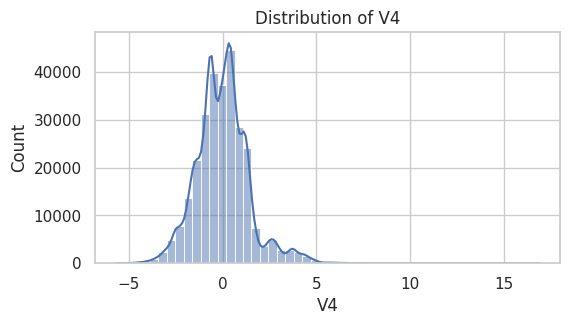

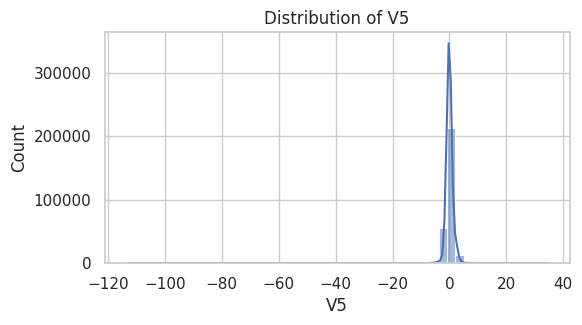

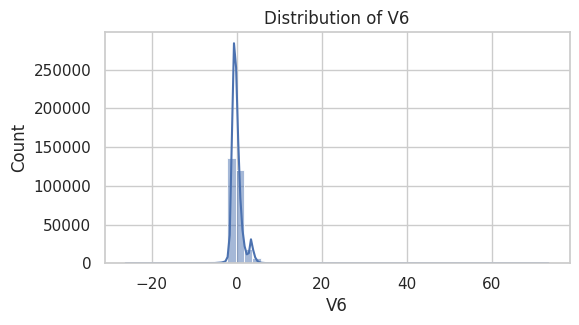

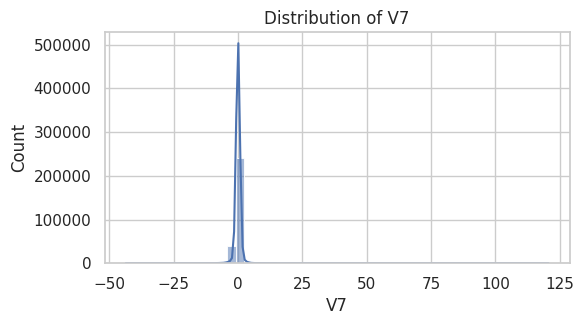

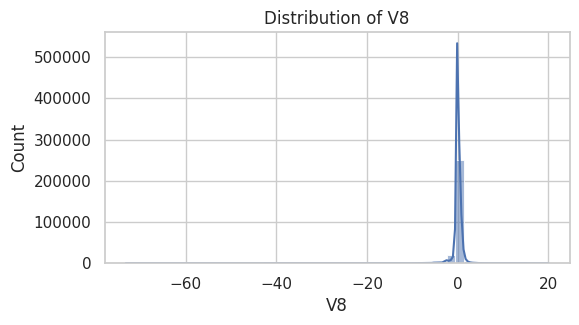

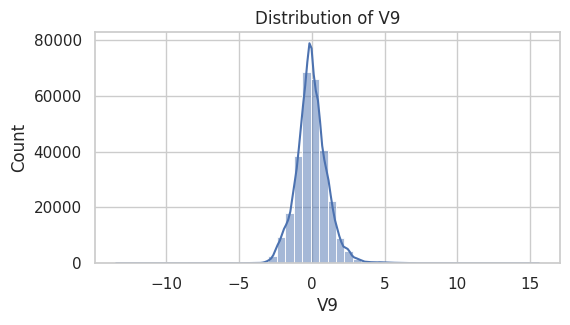

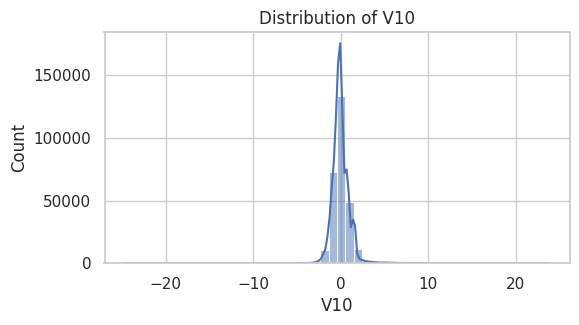

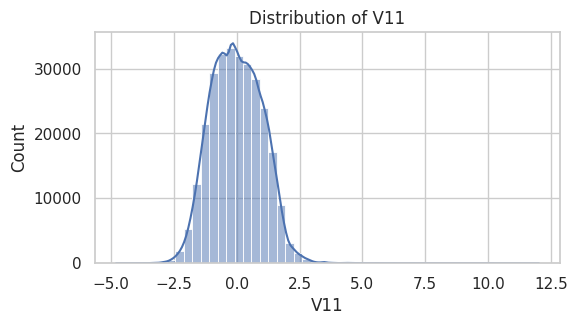

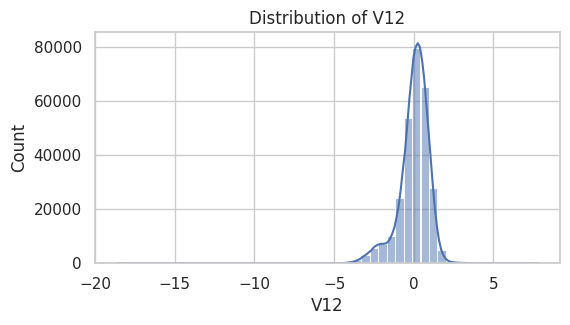

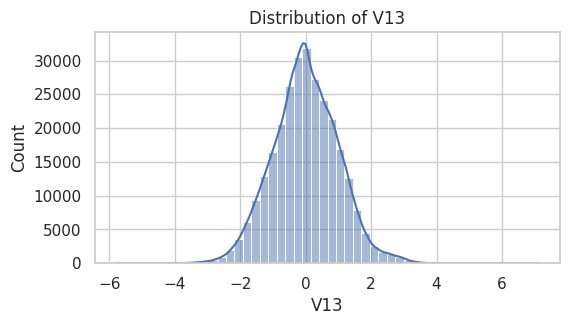

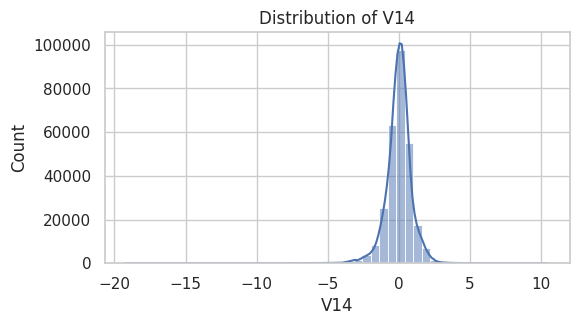

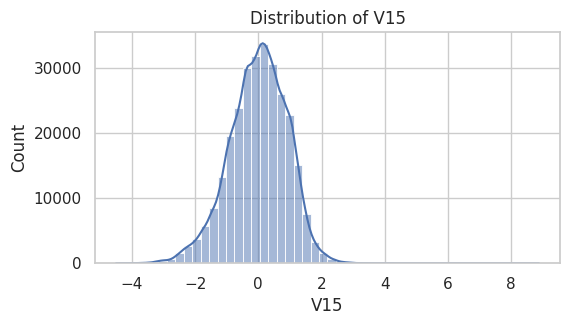

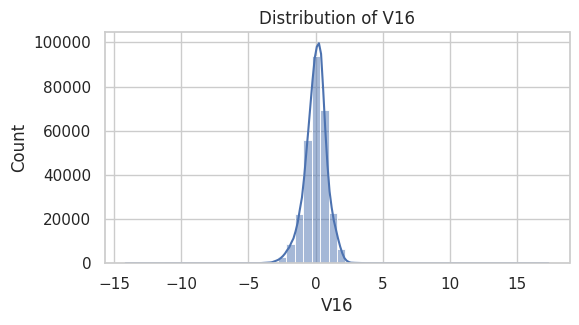

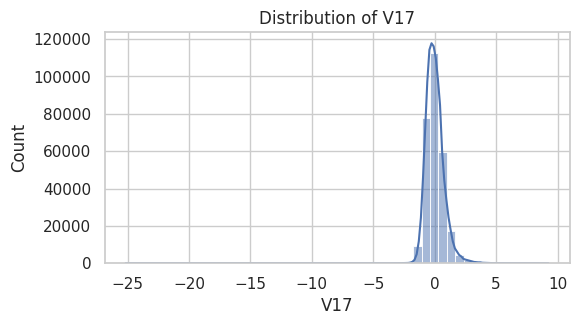

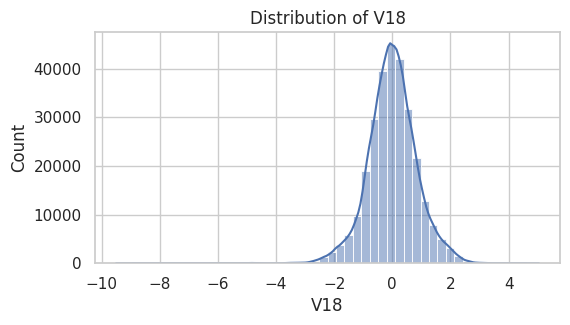

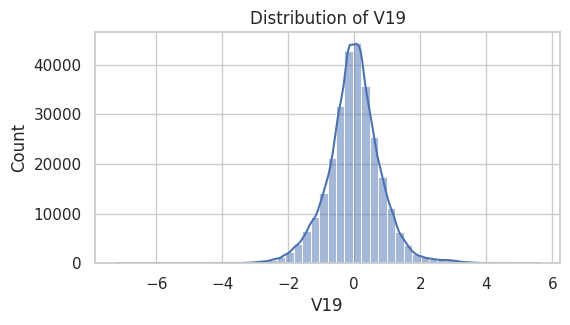

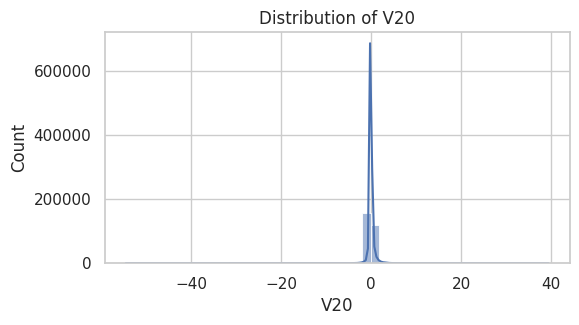

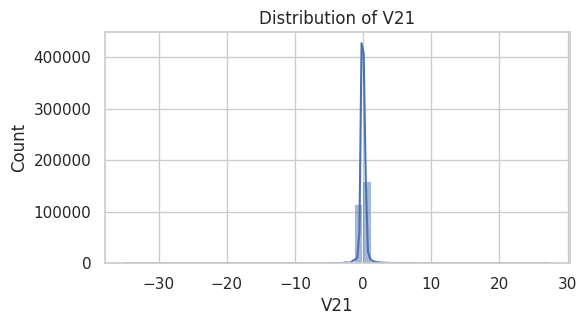

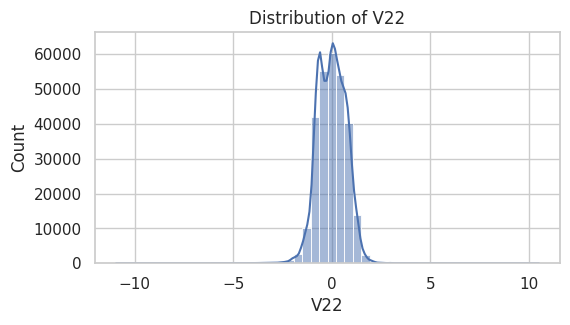

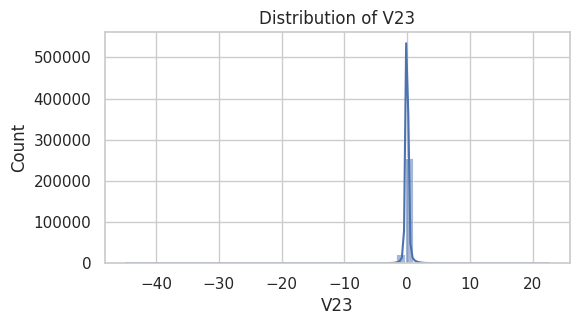

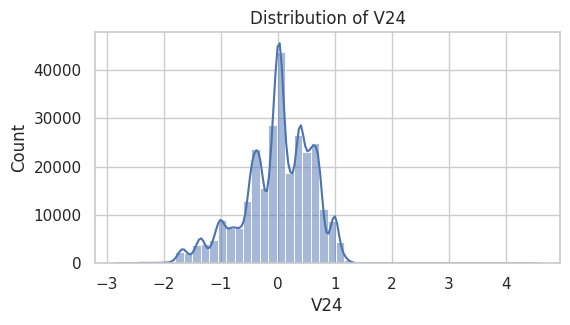

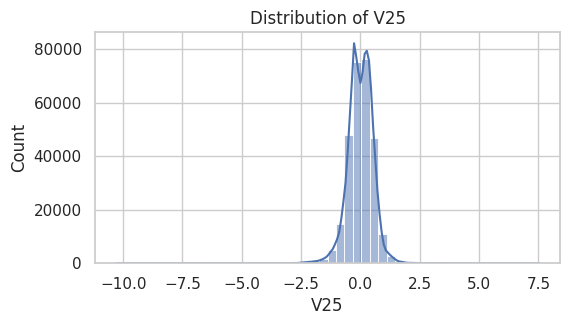

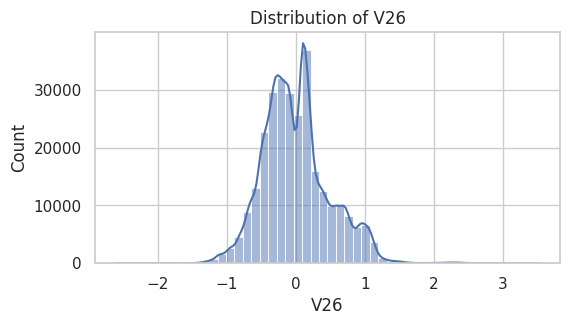

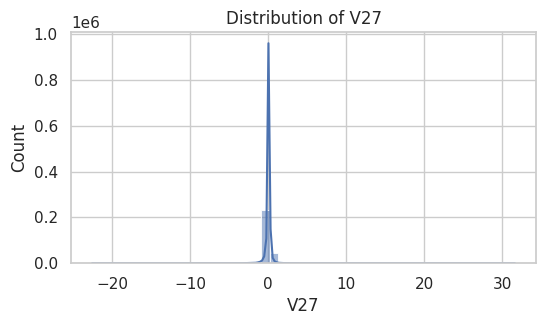

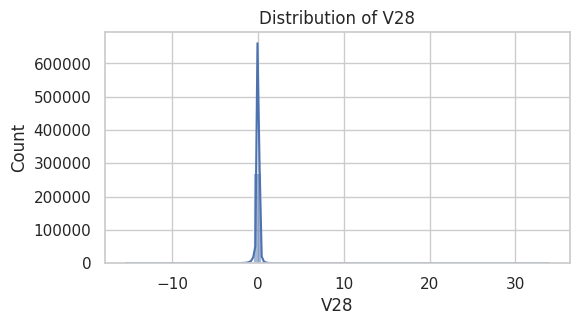

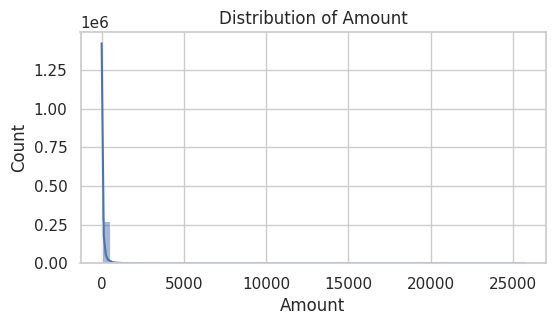

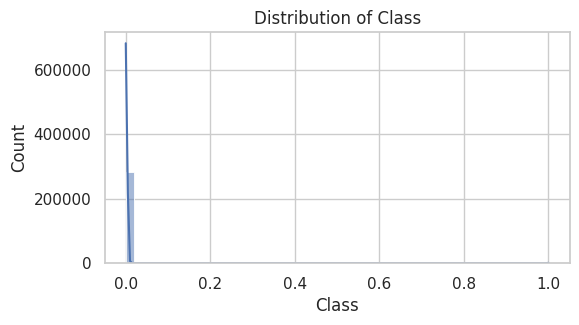

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
from scipy.stats import skew, kurtosis

In [ ]:
print("Skewness and Kurtosis:")
for col in num_cols:
    print(f"{col}: Skew={skew(df[col]):.2f}, Kurtosis={kurtosis(df[col]):.2f}")

Skewness and Kurtosis:
Time: Skew=-0.04, Kurtosis=-1.29
V1: Skew=-3.27, Kurtosis=32.73
V2: Skew=-4.70, Kurtosis=96.90
V3: Skew=-2.15, Kurtosis=25.19
V4: Skew=0.67, Kurtosis=2.62
V5: Skew=-2.41, Kurtosis=209.27
V6: Skew=1.83, Kurtosis=42.84
V7: Skew=2.89, Kurtosis=414.13
V8: Skew=-8.31, Kurtosis=215.01
V9: Skew=0.54, Kurtosis=3.52
V10: Skew=1.25, Kurtosis=29.84
V11: Skew=0.34, Kurtosis=1.55
V12: Skew=-2.20, Kurtosis=18.94
V13: Skew=0.06, Kurtosis=0.20
V14: Skew=-1.92, Kurtosis=23.04
V15: Skew=-0.31, Kurtosis=0.29
V16: Skew=-1.05, Kurtosis=9.85
V17: Skew=-3.69, Kurtosis=93.32
V18: Skew=-0.25, Kurtosis=2.51
V19: Skew=0.11, Kurtosis=1.73
V20: Skew=-2.04, Kurtosis=273.22
V21: Skew=2.82, Kurtosis=184.81
V22: Skew=-0.18, Kurtosis=2.47
V23: Skew=-5.87, Kurtosis=442.68
V24: Skew=-0.55, Kurtosis=0.62
V25: Skew=-0.42, Kurtosis=4.29
V26: Skew=0.58, Kurtosis=0.92
V27: Skew=-0.75, Kurtosis=259.17
V28: Skew=11.56, Kurtosis=959.36
Amount: Skew=16.98, Kurtosis=844.46
Class: Skew=24.43, Kurtosis=594.85


##  Bivariate Analysis

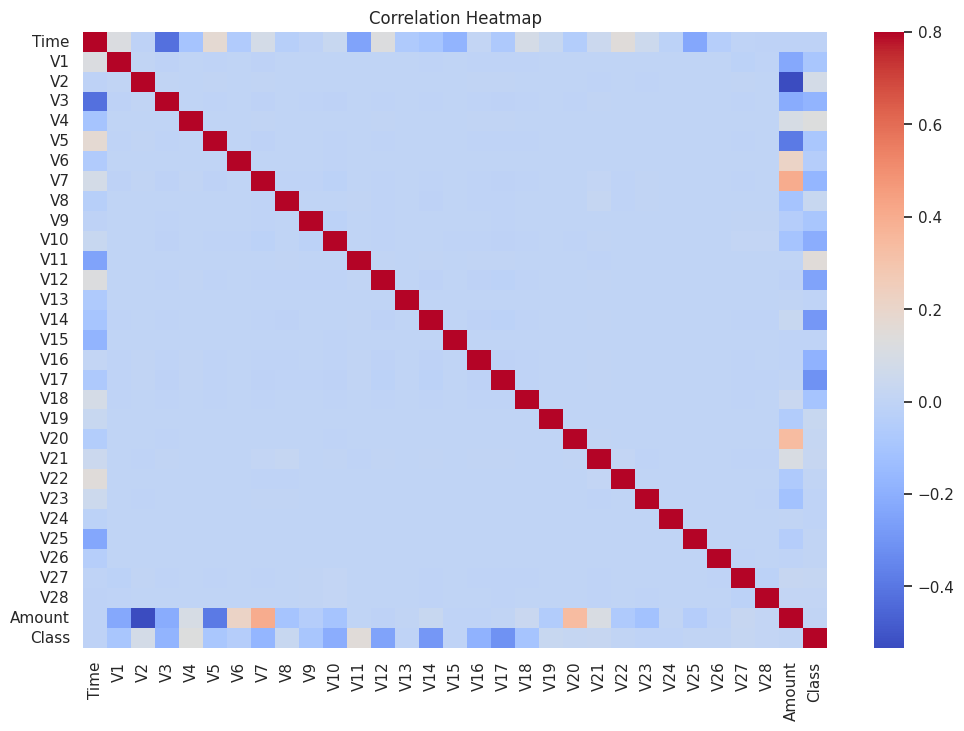

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', vmax=0.8)
plt.title('Correlation Heatmap')
plt.show()

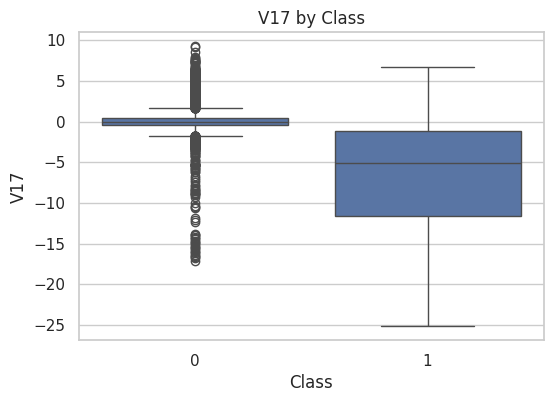

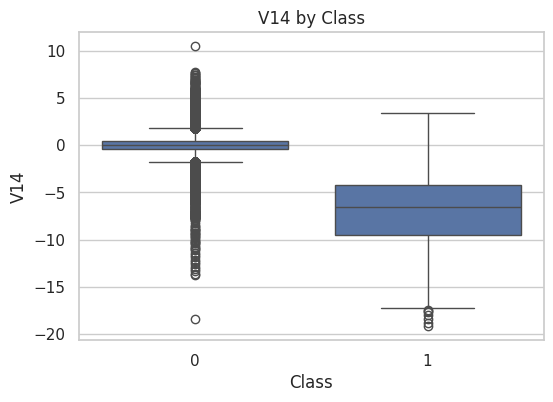

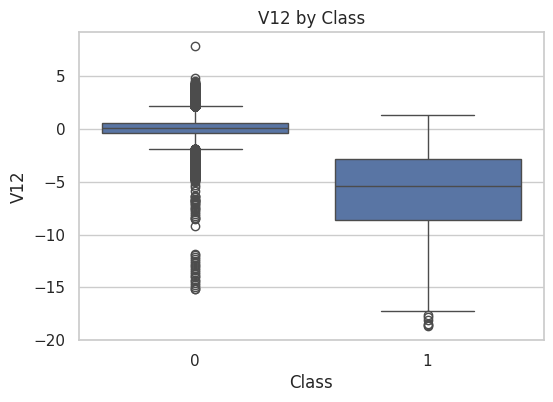

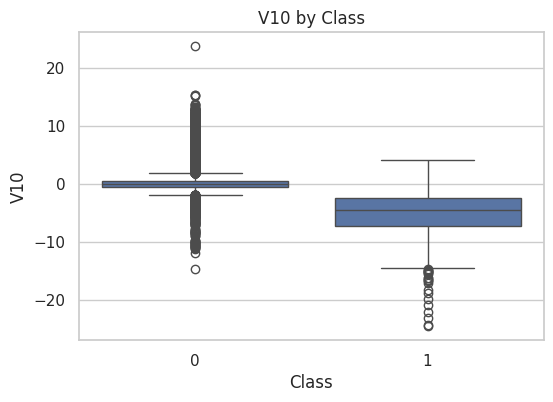

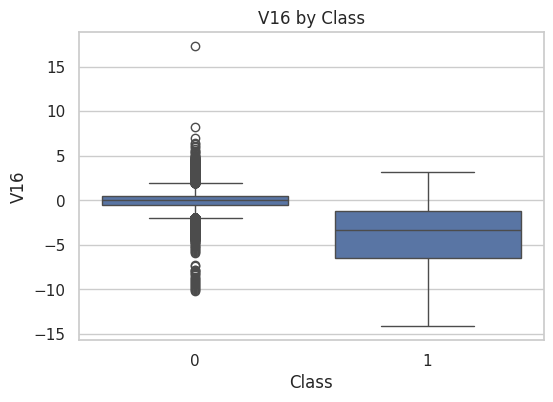

In [ ]:
corrs = df.corr()['Class'].drop('Class').abs().sort_values(ascending=False).head(5).index
for col in corrs:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Class', y=col, data=df)
    plt.title(f'{col} by Class')
    plt.show()

##  Multivariate Analysis (Pairplot Sample)

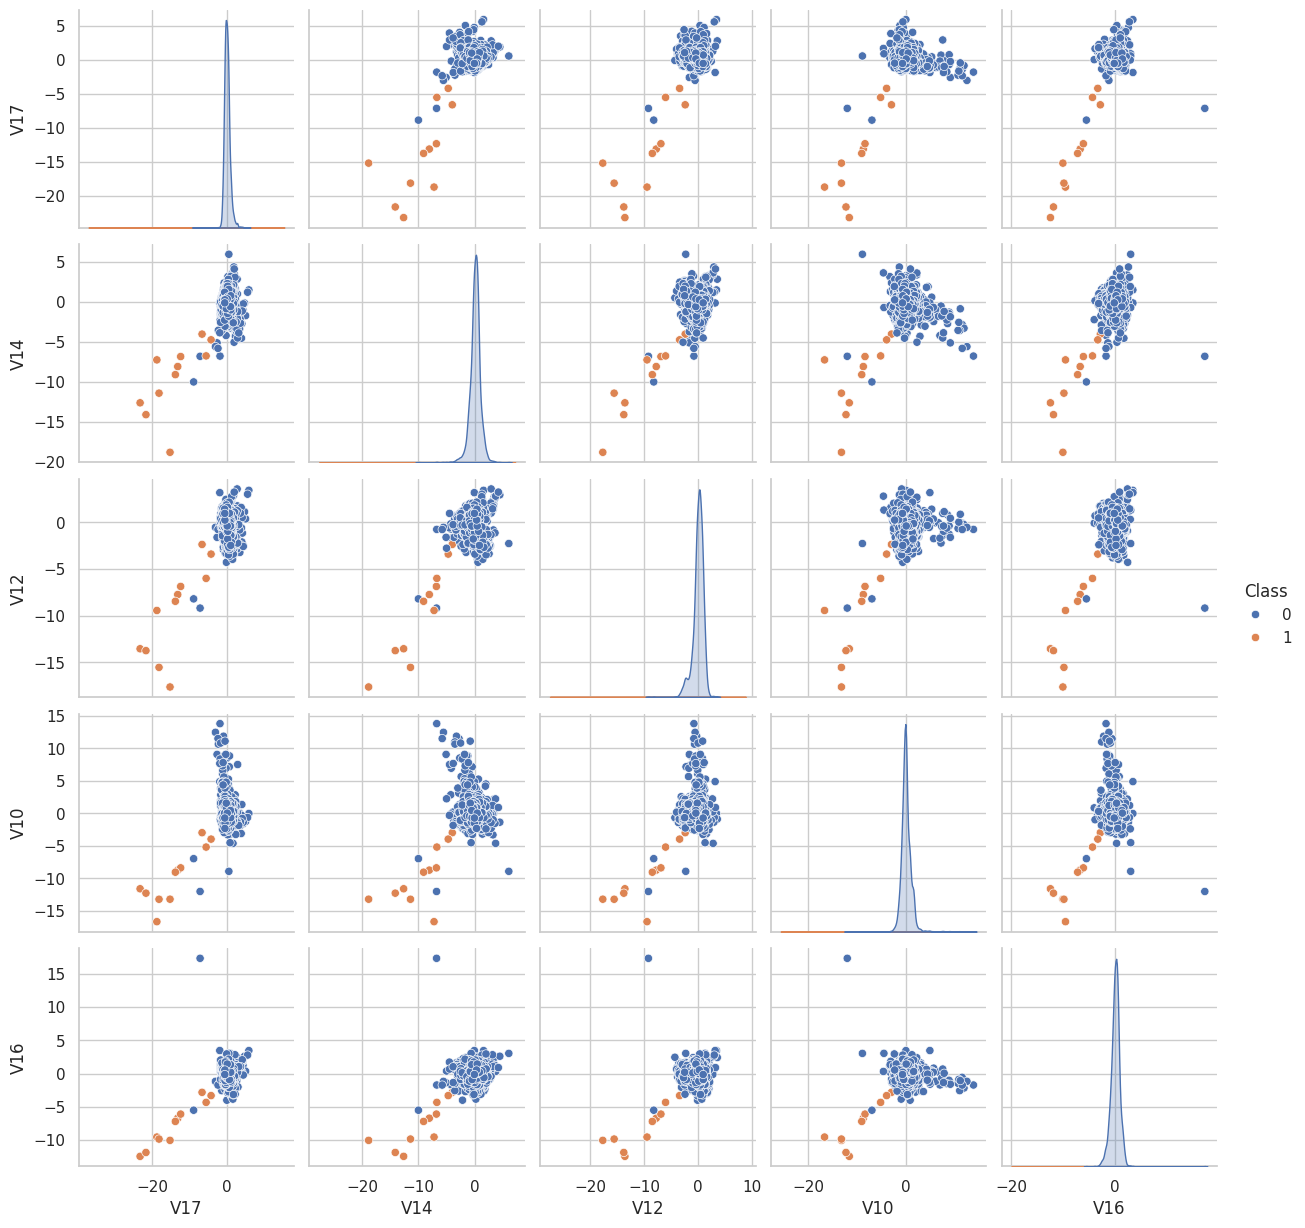

In [ ]:
sampled_df = df.sample(n=5000, random_state=1)
sns.pairplot(sampled_df, vars=corrs.tolist(), hue='Class')
plt.show()

##  Feature Engineering

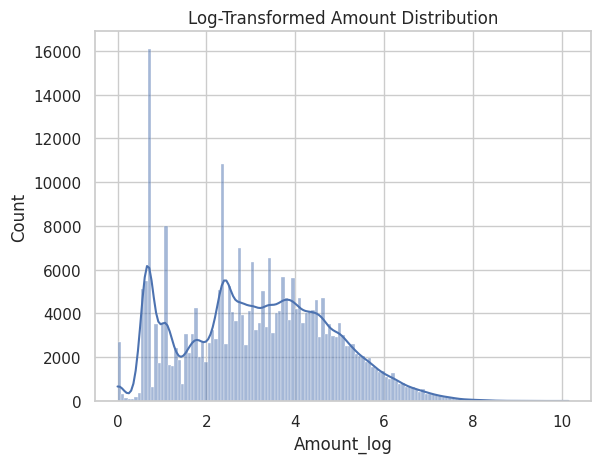

In [ ]:
df['Amount_log'] = np.log1p(df['Amount'])
sns.histplot(df['Amount_log'], kde=True)
plt.title("Log-Transformed Amount Distribution")
plt.show()